<a href="https://colab.research.google.com/github/T-Naveen-2308/IITM-MLT-Assignments/blob/main/W2_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-2



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

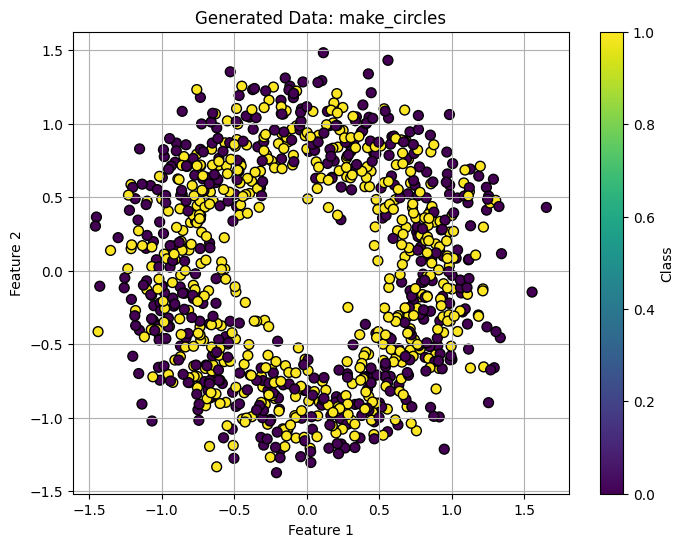

In [ ]:
# Enter your solution here

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Generated Data: make_circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.colorbar(label='Class')
plt.show()

## Problem 2
How many samples are there in the dataset?


In [ ]:
# Enter your solution here

print(X.shape[0])

1000


## Problem 3
How many features are there in the dataset?

In [ ]:
# Enter your solution here

print(X.shape[1])

2


## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [ ]:
# Enter your solution here

def kernel(x1, x2):
  return (x1.T @ x2 + 1)**2

K1 = np.zeros((X.shape[0], X.shape[0]))

sumi = 0
for i in range(X.shape[0]):
  for j in range(X.shape[0]):
    K1[i][j] = kernel(X[i], X[j])
    sumi += K1[i][j]**2

from math import sqrt

print(sqrt(sumi/X.shape[0]**2))

2.096195646589976


## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [ ]:
# Enter your solution here

from math import exp

sigma = 2

def kernel(x1, x2):
  return exp(-(np.sum((x1-x2)**2))/(2*sigma**2))

K = np.zeros((X.shape[0], X.shape[0]))

sumi = 0
for i in range(X.shape[0]):
  for j in range(X.shape[0]):
    K[i][j] = kernel(X[i], X[j])
    sumi += K[i][j]**2

from math import sqrt

print(sqrt(sumi/X.shape[0]**2))

0.8079400085319918


## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [ ]:
# Enter your solution here

def center(K):
  n = K.shape[0]
  I = np.ones((n, n)) / n
  return K - I @ K - K @ I + I @ K @ I

KC = center(K1)
n = KC.shape[0]

sumi = 0
for i in range(n):
  for j in range(n):
    sumi += KC[i][j]**2

print(sqrt(sumi/n**2))

1.4517985176976662


## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [ ]:
# Enter your solution here

KC1 = center(K1)

eigenvalues, eigenvectors = np.linalg.eigh(KC1)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

alpha = sqrt(eigenvalues[0]) * eigenvectors[:, 0]
beta = sqrt(eigenvalues[1]) * eigenvectors[:, 1]

sumi = 0
for i in range(alpha.shape[0]):
  sumi += abs(alpha[i])+abs(beta[i])
print(sumi/alpha.shape[0])

1.744726799095334
